<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [2]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 7.4 MB/s 
     |████████████████████████████████| 9.8 MB 34.6 MB/s 
     |████████████████████████████████| 11.2 MB 41.3 MB/s 
     |████████████████████████████████| 718 kB 56.7 MB/s 
     |████████████████████████████████| 930 kB 44.4 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640173 sha256=00884e0e0ee592f945c91161b5ac6e92e68362bec2ad31b440205639805ba256
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 7.6 MB/s 
     |████████████████████████████████| 3.3 MB 56.4 

In [3]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [360]:
# скачаем данные
!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/HH%20Spot%20Price.csv
!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv

--2022-04-24 12:32:44--  https://github.com/rishabh89007/Time_Series_Datasets/blob/main/HH%20Spot%20Price.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘HH Spot Price.csv.1’

HH Spot Price.csv.1     [ <=>                ] 186.82K  1022KB/s    in 0.2s    

2022-04-24 12:32:44 (1022 KB/s) - ‘HH Spot Price.csv.1’ saved [191302]

--2022-04-24 12:32:44--  https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Nuclear Capacity.csv.1’

Nuclear Capacity.cs     [  <=>               ]   1.22M  3.32MB/s    in 0.4s    

2022-04-24 12:32:45 (3.32 MB/s) - ‘Nuclear Capacity.csv.1’ saved [1284850]



Попытался сначала скачать датасеты через wget, но при формировании пандас датафрейма возникала ошибка, поэтому пришлось скачать файлы на локалку и затем подгрузить их в колаб.

In [112]:
# считаем файлы
ts1 = pd.read_csv("HH Spot Price.csv")
ts2 = pd.read_csv("Nuclear Capacity.csv")

In [114]:
ts1.rename(columns = {'Unnamed: 0' : 'dt', 'Henry Hub Natural Gas Spot Price, Monthly (Dollars per Million Btu)' : 'data'}, inplace = True) 

In [115]:
ts1['dt'] = ts1['dt'].apply(lambda x: pd.to_datetime(x[:-1], format='%Y %m'))

In [116]:
ts1

,dt,data
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25
...,...,...
286,2020-11-01,2.61
287,2020-12-01,2.59
288,2021-01-01,2.71
289,2021-02-01,5.35


In [117]:
def make_date(x):
  arr = x.split()
  y = arr[0]
  m_d = arr[1]
  m = m_d[:2]
  d = m_d[2:]
  return f"{y}-{m}-{d}"

In [118]:
ts2.rename(columns = {'Unnamed: 0' : 'dt', 'U.S. nuclear capacity, daily (Megawatts)' : 'data'}, inplace = True) 

In [119]:
ts2['dt'] = ts2['dt'].apply(lambda x: make_date(x))

In [120]:
ts2

,dt,data
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9
...,...,...
5220,2021-04-17,96434.9
5221,2021-04-18,96434.9
5222,2021-04-19,96434.9
5223,2021-04-20,96434.9


In [121]:
# сделаем разбиение на train/test
ts1_train = ts1.iloc[:int(0.8*len(ts1))]
ts1_test = ts1.iloc[int(0.8*len(ts1)) + 1:]

ts2_train = ts2.iloc[:int(0.8*len(ts2))]
ts2_test = ts2.iloc[int(0.8*len(ts2)) + 1:]

In [122]:
X1_train = ts1_train['dt']
y1_train = ts1_train['data']
X1_test = ts1_test['dt']
y1_test = ts1_test['data']

X2_train = ts2_train['dt']
y2_train = ts2_train['data']
X2_test = ts2_test['dt']
y2_test = ts2_test['data']

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

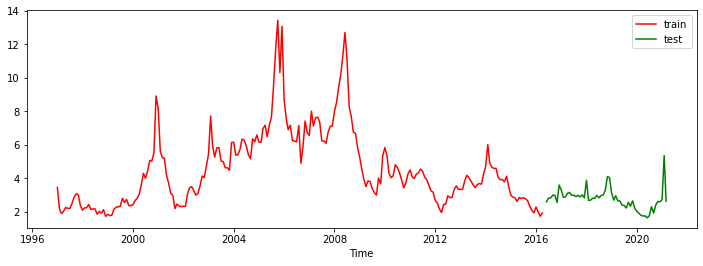

In [123]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c='r', label='train')
plt.plot(X1_test, y1_test, c='g', label='test')
plt.xlabel('Time')
plt.legend()
plt.show()

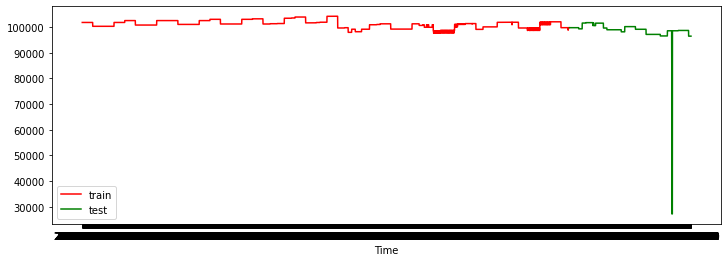

In [105]:
plt.figure(figsize=(12, 4))
plt.plot(X2_train, y2_train, c='r', label='train')
plt.plot(X2_test, y2_test, c='g', label='test')
plt.xlabel('Time')
plt.legend()
plt.show()

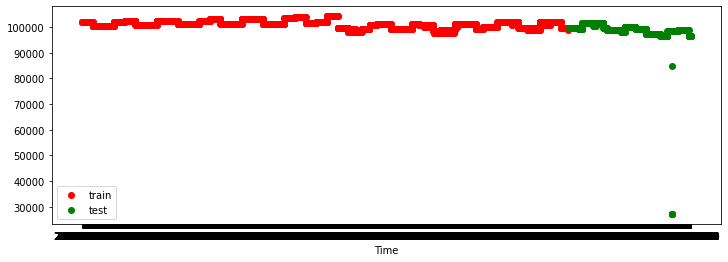

In [106]:
plt.figure(figsize=(12, 4))
plt.scatter(X2_train, y2_train, c='r', label='train')
plt.scatter(X2_test, y2_test, c='g', label='test')
plt.xlabel('Time')
plt.legend()
plt.show()

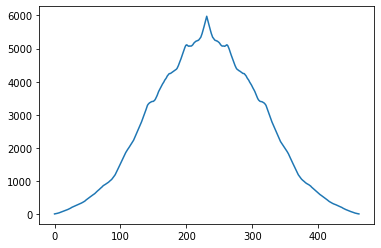

In [124]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
plt.plot(np.correlate(y1_train, y1_train, mode='full'))

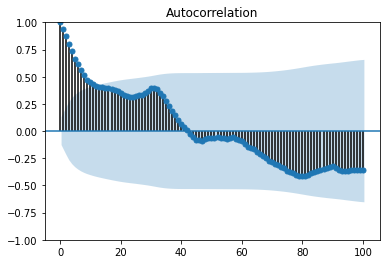

In [128]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y1_train, lags=100)
plt.show()

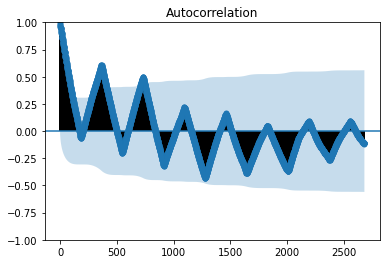

In [76]:
plot_acf(y2_train, lags=len(y2_train)-1500)
plt.show()

На 1м графике сезонной составляющей не видно, в отличие от 2го, где сезонность отражают получающиеся треугольники, длина основания которых равна как раз примерно году.

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

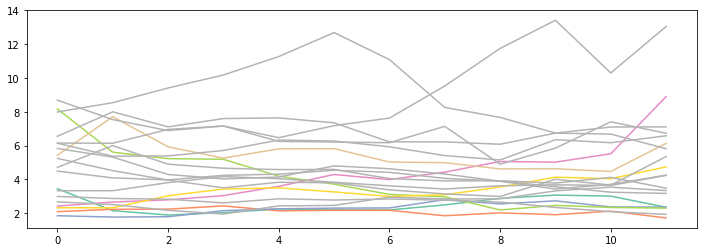

In [129]:
per = 12
n = int(len(X1_train)/per)
col = [plt.cm.Set2(i) for i in range(n)] 

plt.figure(figsize=(12, 4))
for i in range(n):
    plt.plot(np.arange(per), y1_train[i*per:(i+1)*per], c=col[i])

plt.show()

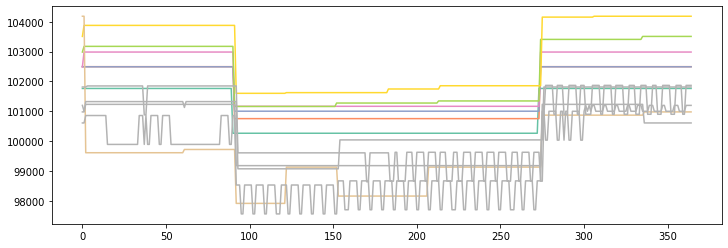

In [130]:
per = 365
n = int(len(X2_train)/per)
col = [plt.cm.Set2(i) for i in range(n)] 

plt.figure(figsize=(12, 4))
for i in range(n):
    plt.plot(np.arange(per), y2_train[i*per:(i+1)*per], c=col[i])

plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [149]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
nf = NaiveForecaster(strategy='last')
nf.fit(y1_train)
y_pred = nf.predict(X1_test.index)

In [150]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error

print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 0.8717241379310346


Может показаться, что метрика хорошая, но если нарисовать предикт...

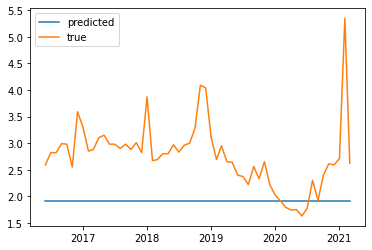

In [154]:
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')
plt.legend()
plt.show()

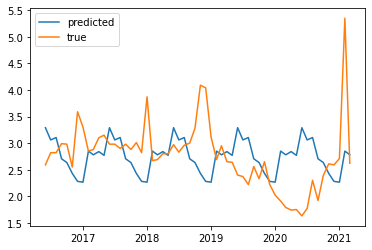

In [183]:
nf = NaiveForecaster(strategy="mean", window_length=20, sp=12)
nf.fit(y1_train)
y_pred = nf.predict(X1_test.index)
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')
plt.legend()
plt.show()

In [184]:
from sklearn.metrics import mean_absolute_error

print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 0.5458620689655171


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [185]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
arima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
arima.fit(y1_train)
y_pred = arima.predict(X1_test.index)

In [186]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 2.2690652160686877


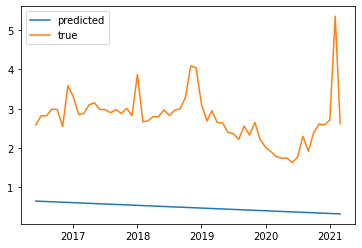

In [187]:
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

In [188]:
auto_arima = AutoARIMA()
auto_arima.fit(y1_train)
y_pred = auto_arima.predict(X1_test.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using z

In [189]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 0.8693754738045163


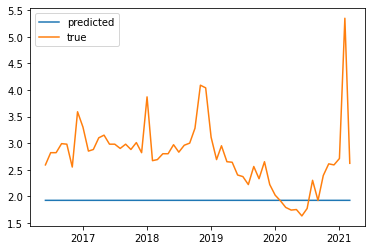

In [190]:
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [194]:
#from orbit.models.lgt import LGTFull
from orbit.models import LGT
from orbit.models import DLT
#from orbit.models.dlt import DLTFull

# ваш код обучения моделей здесь
lgt = LGT(response_col='data', date_col='dt', seasonality=12, seed=12345)
lgt.fit(ts1_train)
y_pred = lgt.predict(ts1_test)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d372bb7bc77e1df83218127fc9dd707d NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [197]:
print(f"MAE is {mean_absolute_error(y_pred['prediction'], y1_test)}")

MAE is 0.8809019070061684


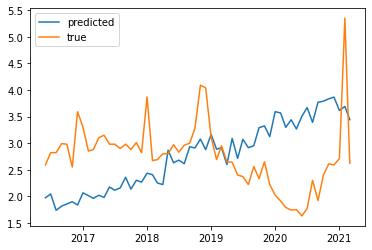

In [198]:
plt.plot(X1_test, y_pred['prediction'], label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

In [199]:
dlt = DLT(response_col='data', date_col='dt', seasonality=12, seed=12345)
dlt.fit(ts1_train)
y_pred = dlt.predict(ts1_test)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [200]:
print(f"MAE is {mean_absolute_error(y_pred['prediction'], y1_test)}")

MAE is 0.8705913093491394


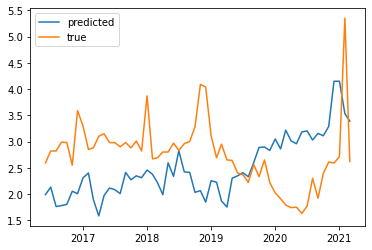

In [201]:
plt.plot(X1_test, y_pred['prediction'], label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [202]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
expsm = ExponentialSmoothing(sp=12)
expsm.fit(y1_train)
y_pred = expsm.predict(X1_test.index)

In [204]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 0.8748936427578786


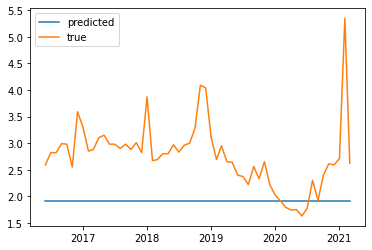

In [206]:
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

In [220]:
ets = AutoETS(auto=True, sp=12)
ets.fit(y1_train)
y_pred = ets.predict(X1_test.index)

In [221]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y1_test)}")

MAE is 0.8717392048342528


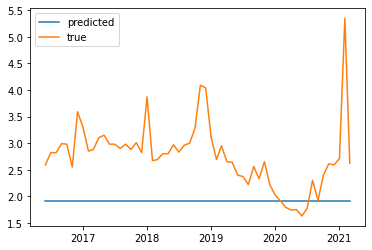

In [222]:
plt.plot(X1_test, y_pred, label='predicted')
plt.plot(X1_test, y1_test, label='true')

plt.legend()
plt.show()

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

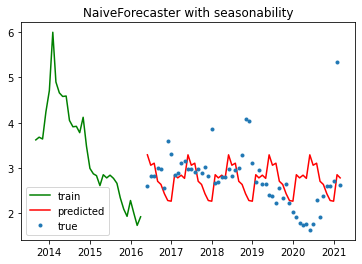

In [231]:
# нарисуйте пресказания
nf = NaiveForecaster(strategy="mean", window_length=20, sp=12)
nf.fit(y1_train)
y_pred = nf.predict(X1_test.index)

plt.plot(X1_train[200:], y1_train[200:], c="g", label='train')
plt.plot(X1_test, y_pred, c="r", label='predicted')
plt.plot(X1_test, y1_test, ".", label='true')
plt.legend()
plt.title("NaiveForecaster with seasonability")
plt.show()

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [232]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
nf = NaiveForecaster(strategy='last')
nf.fit(y2_train)
y_pred = nf.predict(X2_test.index)

In [233]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y2_test)}")

MAE is 1667.5659003831447


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


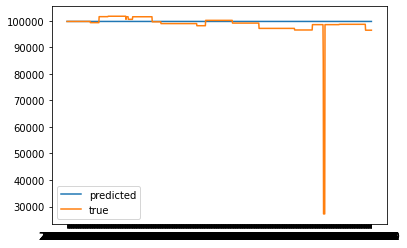

In [235]:
plt.plot(X2_test, y_pred, label='predicted')
plt.plot(X2_test, y2_test, label='true')
plt.legend()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


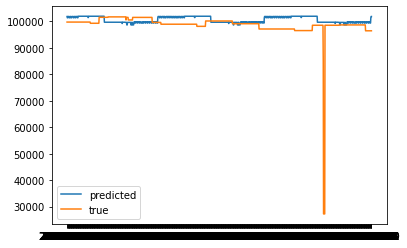

In [243]:
nf = NaiveForecaster(strategy="mean", window_length=700, sp=365)
nf.fit(y2_train)
y_pred = nf.predict(X2_test.index)
plt.plot(X2_test, y_pred, label='predicted')
plt.plot(X2_test, y2_test, label='true')
plt.legend()
plt.show()

In [244]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred, y2_test)}")

MAE is 2570.037116858241


### KTR из orbit (1 балл).



In [248]:
#from orbit.models.ktrlite import KTRLiteMAP
from orbit.models import KTRLite

# ваш код обучения моделей здесь
ktr = KTRLite(response_col='data', date_col='dt', seasonality=365)
ktr.fit(ts2_train)
y_pred = ktr.predict(ts2_test)

In [250]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred['prediction'], y2_test)}")

MAE is 2445.2475368403384


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


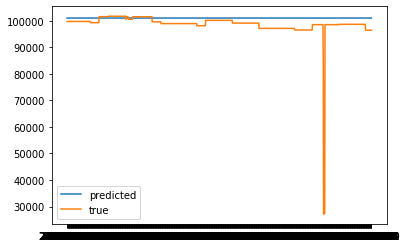

In [252]:
plt.plot(X2_test, y_pred['prediction'], label='predicted')
plt.plot(X2_test, y2_test, label='true')
plt.legend()
plt.show()

### Phophet (1 балл).



In [254]:
from prophet import Prophet

# ваш код обучения моделей здесь
ts2_pro_train = ts2.rename(columns = {'dt' : 'ds', 'data' : 'y'}) 
ts2_pro_test = ts2.rename(columns = {'dt' : 'ds', 'data' : 'y'}) 
pro = Prophet()
pro.fit(ts2_pro_train)
future = pro.make_future_dataframe(periods=365)
y_pred = pro.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [257]:
y_pred['yhat']

0       102008.611975
1       102029.002251
2       102033.951000
3       102040.569236
4       102127.956993
            ...      
5585     93174.763468
5586     93239.559697
5587     93248.699374
5588     93250.477172
5589     93261.551765
Name: yhat, Length: 5590, dtype: float64

In [264]:
# посчитайте метрики на test
print(f"MAE is {mean_absolute_error(y_pred[-1044:]['yhat'], y2_test)}")

MAE is 2506.1211993993124


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


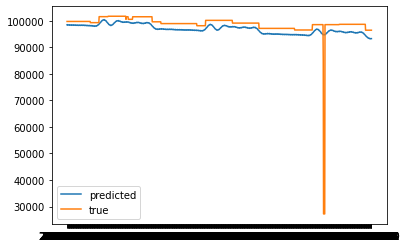

In [265]:
plt.plot(X2_test, y_pred[-1044:]['yhat'], label='predicted')
plt.plot(X2_test, y2_test, label='true')
plt.legend()
plt.show()

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

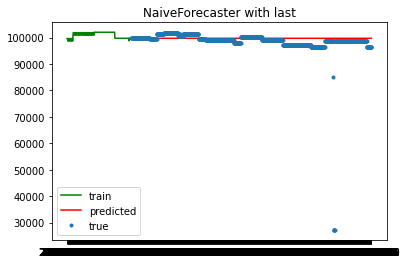

In [270]:
# нарисуйте пресказания
nf = NaiveForecaster(strategy='last')
nf.fit(y2_train)
y_pred = nf.predict(X2_test.index)

plt.plot(X2_train[3900:], y2_train[3900:], c="g", label='train')
plt.plot(X2_test, y_pred, c="r", label='predicted')
plt.plot(X2_test, y2_test, ".", label='true')
plt.legend()
plt.title("NaiveForecaster with last")
plt.show()

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [292]:
X = pd.DataFrame()

In [293]:
X['year'] = ts1['dt'].apply(lambda x: str(x)[:4])
X['month'] = ts1['dt'].apply(lambda x: str(x)[5:7])
y = ts1['data']

In [296]:
X_train = X.iloc[:int(0.8*len(X))]
y_train = y.iloc[:int(0.8*len(X))]
X_test = X.iloc[int(0.8*len(X)):]
y_test = y.iloc[int(0.8*len(X)):]

In [299]:
# обучите классические модели ML
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [300]:
print(f"MAE is {mean_absolute_error(y_pred, y_test)}")

MAE is 2.131258560854307


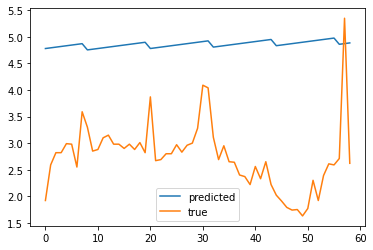

In [307]:
plt.plot(np.arange(len(y_test)), y_pred, label='predicted')
plt.plot(np.arange(len(y_test)), y_test, label='true')

plt.legend()
plt.show()

In [357]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [358]:
print(f"MAE is {mean_absolute_error(y_pred, y_test)}")

MAE is 0.4655423728813559


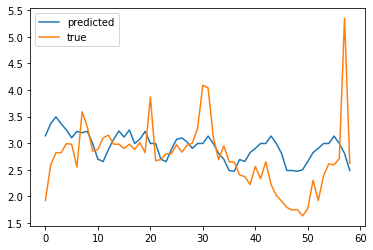

In [359]:
plt.plot(np.arange(len(y_test)), y_pred, label='predicted')
plt.plot(np.arange(len(y_test)), y_test, label='true')

plt.legend()
plt.show()

In [346]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [347]:
print(f"MAE is {mean_absolute_error(y_pred, y_test)}")

MAE is 0.8498254237288143


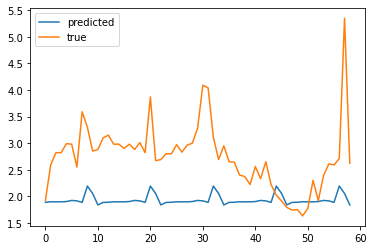

In [348]:
plt.plot(np.arange(len(y_test)), y_pred, label='predicted')
plt.plot(np.arange(len(y_test)), y_test, label='true')

plt.legend()
plt.show()

In [349]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [350]:
print(f"MAE is {mean_absolute_error(y_pred, y_test)}")

MAE is 0.8768260396614479


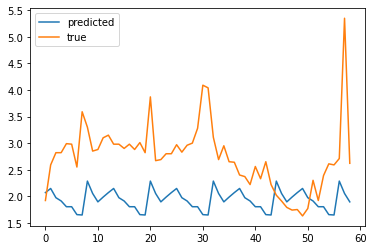

In [351]:
plt.plot(np.arange(len(y_test)), y_pred, label='predicted')
plt.plot(np.arange(len(y_test)), y_test, label='true')

plt.legend()
plt.show()

Таким образом, лучше всего с задачей справился kNN.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания